In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
print(df['rate'].dtype)
def handleRate(value):
    value =  str(value).split('/')
    value = value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

object


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

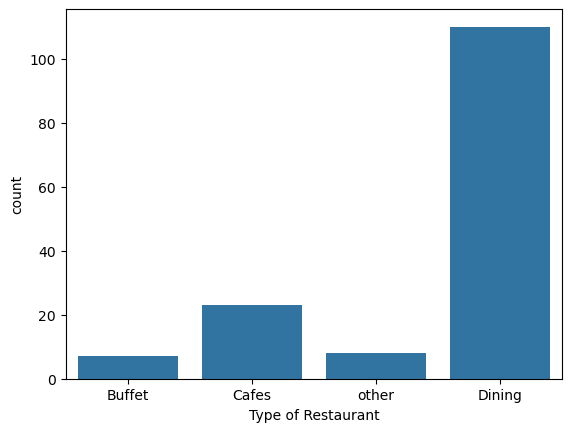

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

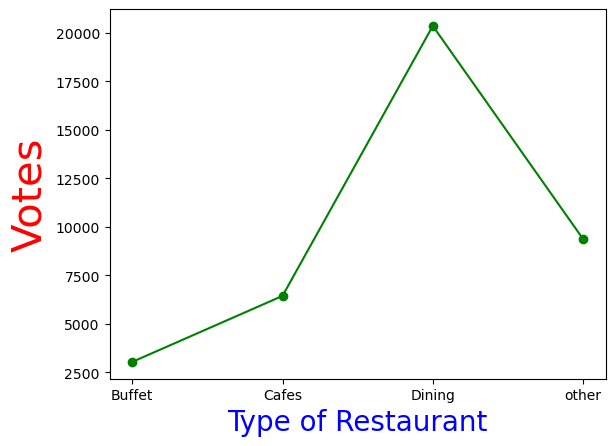

In [7]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green" , marker='o')
plt.xlabel('Type of Restaurant', c='blue', size=20)
plt.ylabel('Votes', c='red', size=30)

##### Conclusion: Dining restaurants are preferred by a larger number of individuals.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

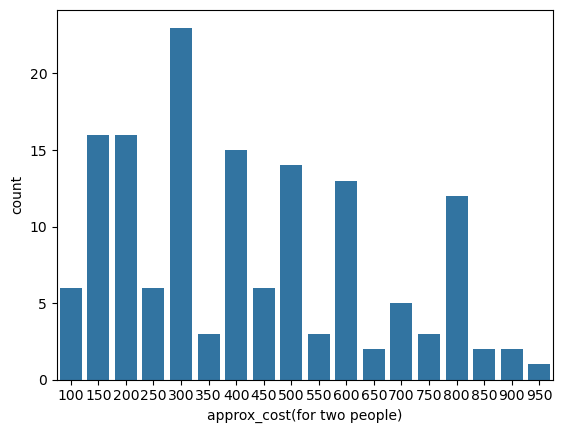

In [9]:
sns.countplot(x=df['approx_cost(for two people)'])

Text(0, 0.5, 'Average rating')

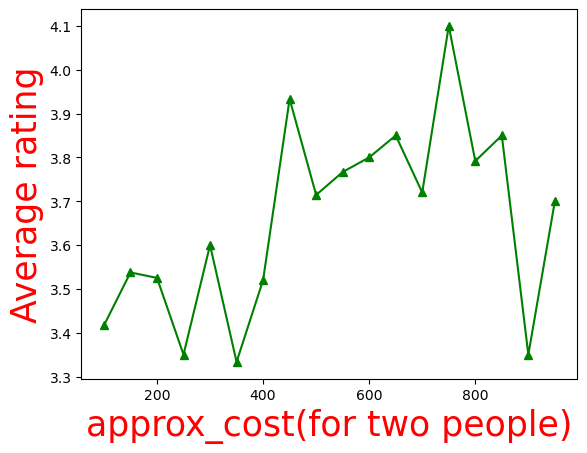

In [10]:
grouped_data1 = df.groupby('approx_cost(for two people)')['rate'].mean()
n = pd.DataFrame({'Cost per Rating':grouped_data1})
plt.plot(n, c='green', marker='^')
plt.xlabel('approx_cost(for two people)',c='red',size=25)
plt.ylabel('Average rating',c='red',size=25)

Text(0, 0.5, 'Average Rating')

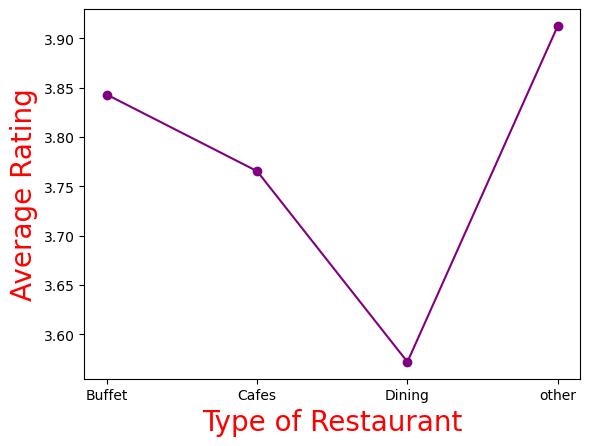

In [11]:
grouped_data2 = df.groupby('listed_in(type)')['rate'].mean()
n1 = pd.DataFrame({'Rating of Restaurant Variety':grouped_data2})
plt.plot(n1, c='purple', marker='o')
plt.xlabel('Type of Restaurant', c='red', size=20)
plt.ylabel('Average Rating', c='red', size=20)

Text(0, 0.5, 'Avg Price for Two People')

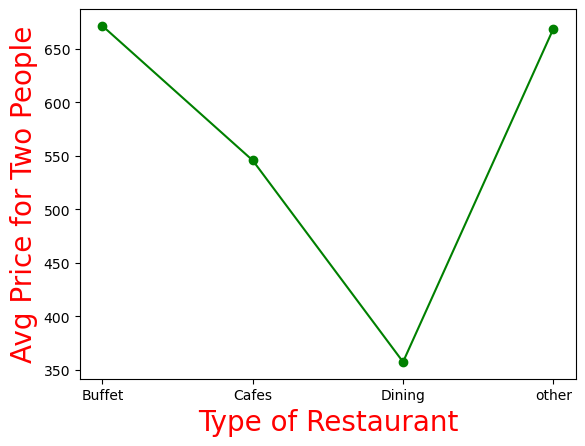

In [12]:
grouped_data3 = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean()
n3 = pd.DataFrame({'Type of Restaurant Avg Cost':grouped_data3})
plt.plot(n3, c='green', marker='o')
plt.xlabel('Type of Restaurant', c='red', size=20)
plt.ylabel('Avg Price for Two People', c='red', size=20)

In [13]:
maxvotes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == maxvotes, 'name']
print("Restaurant(s) with Maximum Votes: ")
print(restaurant_with_max_votes)

Restaurant(s) with Maximum Votes: 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

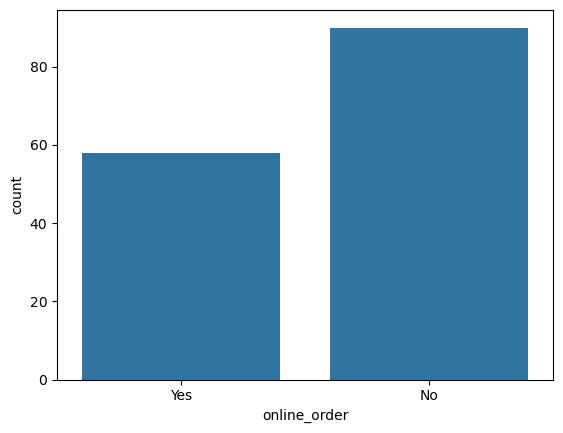

In [14]:
sns.countplot(x=df['online_order'])

##### Conclusion: This suggests that a majority of the restaurants do not accept online orders.

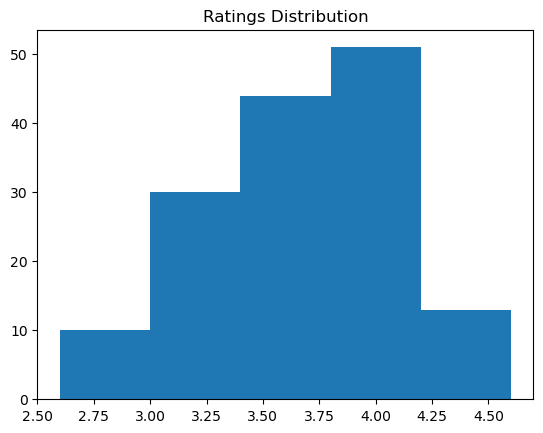

In [31]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

##### The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

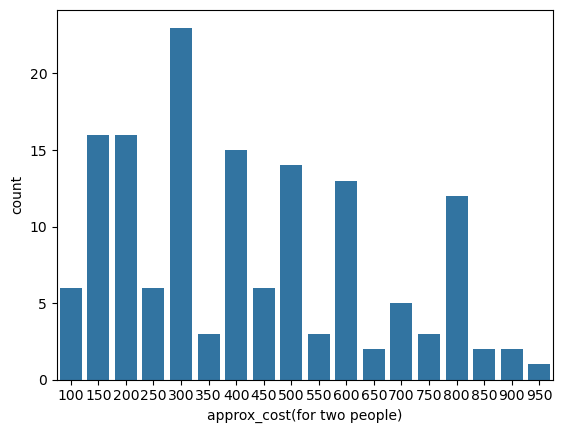

In [34]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

##### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

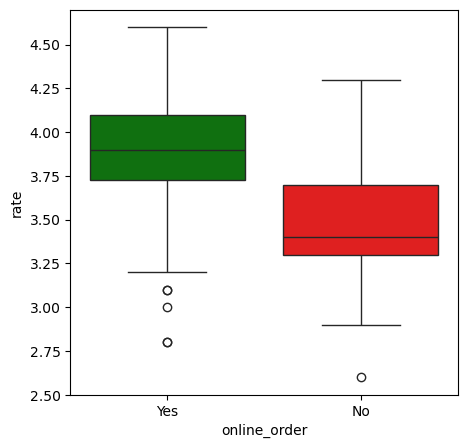

In [74]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = df, hue='online_order', palette=['green', 'red'])

##### CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

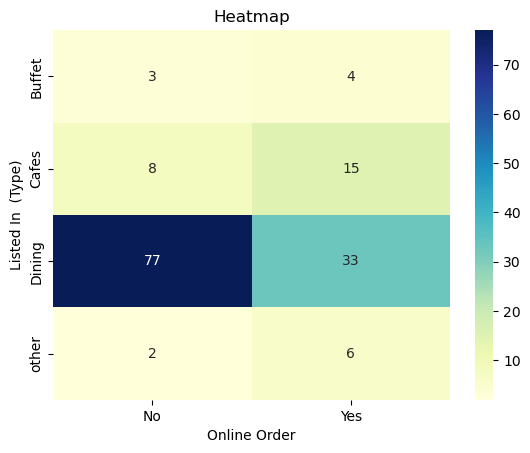

In [79]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In  (Type)')
plt.show()

##### CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.